In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.interpolate import make_interp_spline

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [141]:
folder_path = os.getcwd() + '/results' # Specify the folder containing the CSV files
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')] # Get a list of all CSV files in the folder
dataframes = [] # Initialize an empty list to store DataFrames

# Loop through the CSV files and read them into DataFrames
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    new_df = pd.read_csv(file_path)
    dataframes.append(new_df)
# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dataframes, ignore_index=True)
df

,Unnamed: 0,seed,n_exp,n_sim,num_weeks,num_agents,capacity,threshold,contagious_threshold,contagious_duration,...,mean_attendance,mean_contagious,mean_present_contagious,std_attendance,std_contagious,std_present_contagious,argmax_acft_attendance,max_acft_attendance,argmax_acft_contagious,max_acft_contagious
0,0,20907225,5,0,200,2000,2000,0.61,0.84,5,...,1221.64,0.00,0.00,19.755769,0.000000,0.000000,22,0.181354,0,0.000000
1,1,28476525,5,1,200,2000,2000,0.12,0.95,9,...,0.00,0.00,0.00,0.000000,0.000000,0.000000,0,0.000000,0,0.000000
2,2,55081790,5,2,200,2000,2000,0.84,0.57,2,...,1689.35,0.00,0.00,20.957755,0.000000,0.000000,25,0.242212,0,0.000000
3,3,60430861,5,3,200,2000,2000,0.33,0.95,8,...,228.00,0.00,0.00,0.000000,0.000000,0.000000,0,0.000000,0,0.000000
4,4,27549290,5,4,200,2000,2000,0.63,0.33,8,...,1261.82,0.00,0.00,22.291873,0.000000,0.000000,8,0.140157,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,996,4232601,6,996,200,2000,2000,0.86,0.06,9,...,1487.50,1331.02,818.52,447.369322,506.296632,420.346392,15,0.847564,15,0.854370
4998,997,93321212,6,997,200,2000,2000,0.41,0.06,2,...,818.00,355.07,355.07,0.000000,178.096898,178.096898,0,0.000000,7,0.930762
4999,998,86493932,6,998,200,2000,2000,0.96,0.44,6,...,1918.80,0.00,0.00,10.034939,0.000000,0.000000,12,0.238483,0,0.000000
5000,999,99987107,6,999,200,2000,2000,0.13,0.02,9,...,5.00,0.00,0.00,0.000000,0.000000,0.000000,0,0.000000,0,0.000000


In [142]:
# create new necessay columns

df['inf_last'] = [0 if df.mean_present_contagious.iloc[_] == 0 else 1 for _ in range(len(df.mean_present_contagious))]

cycl = []
for _ in range(len(df)):
    new_cycl = 0
    if abs(df.argmax_acft_attendance.iloc[_] - df.argmax_acft_contagious.iloc[_]) <= 1: 
        if (df.max_acft_attendance.iloc[_] > 0.7) and (df.max_acft_contagious.iloc[_] > 0.7):
            new_cycl = 1
    cycl.append(new_cycl)
df['cycl'] = cycl

In [143]:
# study parameter difference for infection and not infection

pars = ['threshold', 'contagious_threshold', 'contagious_duration', 'people_memory_weight','contagious_thresholdNotPresent', 'SIR_AgentsRecoveryTime']
dict_pars_diff = {'pars':[], 'mean_inf':[], 'mean_no_inf':[], 'diff_pct':[]}

for p in pars:
    df_inf = df[df.inf_last == 1]
    df_no_inf = df[df.inf_last == 0]

    pct_diff = (np.mean(df_inf[p]) - np.mean(df_no_inf[p])) / np.mean(df[p])
    #print(f'The difference between the mean of {p} for infected and not infected is {100 * pct_diff:.2f} %')

    dict_pars_diff['pars'].append(p)
    dict_pars_diff['mean_inf'].append(np.mean(df_inf[p]))
    dict_pars_diff['mean_no_inf'].append(np.mean(df_no_inf[p]))
    dict_pars_diff['diff_pct'].append(pct_diff)

    if True == False:
        plt.hist(df_no_inf[p], color = 'lime', alpha = 0.5, label = 'not infected')
        plt.hist(df_inf[p], color = 'salmon', label = 'infected')
        plt.title(p)
        plt.legend()
        plt.show()

print(len(df_inf), len(df_no_inf))
df_pars_diff = pd.DataFrame(dict_pars_diff)
df_pars_diff



547 4455


,pars,mean_inf,mean_no_inf,diff_pct
0,threshold,0.582962,0.496438,0.171030
1,contagious_threshold,0.178483,0.546278,-0.726786
2,contagious_duration,5.895795,4.943883,0.188573
3,people_memory_weight,0.445740,0.512123,-0.131487
4,contagious_thresholdNotPresent,0.594004,0.488056,0.212047
5,SIR_AgentsRecoveryTime,4.515539,5.680359,-0.209765


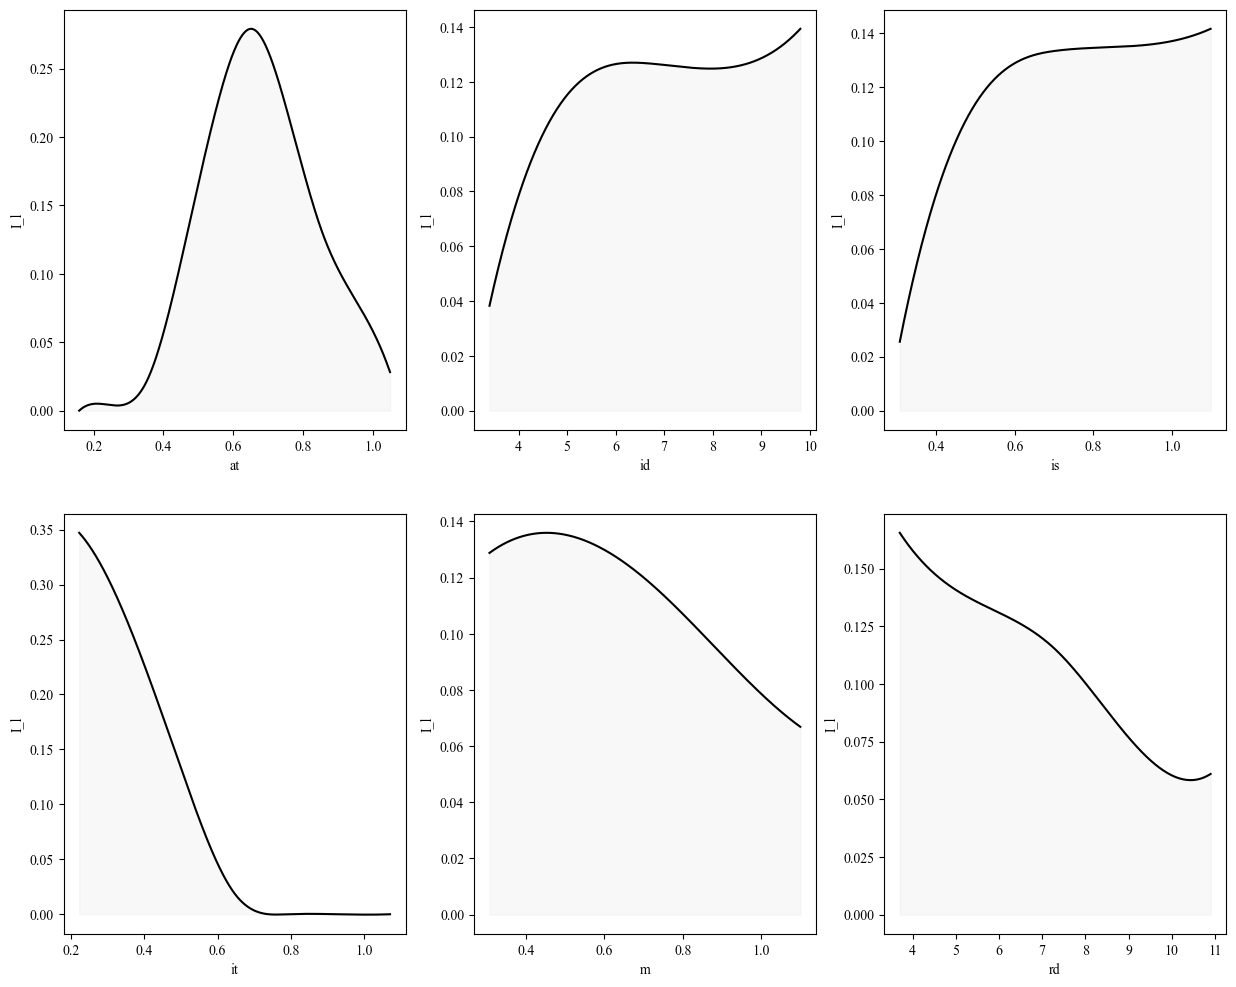

In [144]:
def get_freq(x_name, y_name, n_cat, ax):
    x, y = df[x_name], df[y_name]
    x_max, x_min = x.max(), x.min()

    x_step = (x_max - x_min) / n_cat
    x_range = np.arange(x_min, x_max + x_step, x_step)
    x_mean, y_mean = [], []
    for i in range(len(x_range) - 1):
        xi = x_range[i + 1]
        xi_old = x_range[i]
        df_filt = df[(df[x_name] >= xi_old) & (df[x_name] < xi)]
        y_mean.append(df_filt[y_name].mean())
        x_mean.append(xi + x_step / 2)
    plot_freq(x_mean,y_mean,x_name,y_name, ax)

def plot_freq(x_mean,y_mean,x_name,y_name, ax):

    X_Y_Spline = make_interp_spline(x_mean, y_mean)
    X_ = np.linspace(min(x_mean), max(x_mean), 500)
    Y_ = X_Y_Spline(X_)

    ax.plot(X_, Y_, c = 'k')
    ax.fill_between(X_, Y_, 0, alpha=0.05, color='grey')
    ax.set_xlabel(pars_symb[pars.index(x_name)])
    ax.set_ylabel('I_l')
    

pars = ['threshold', 'contagious_threshold', 'contagious_duration', 'people_memory_weight','contagious_thresholdNotPresent', 'SIR_AgentsRecoveryTime']
pars_symb = ['at', 'it', 'id', 'm', 'is', 'rd']
cat = [10,7,5,5,5,5]
fig, ax = plt.subplots(2,3, figsize=(15,12))
for i,p in enumerate(pars):
    get_freq(p,'inf_last', cat[i],ax[i%2][i//2]) # ax[i//2][i%2]
plt.show()


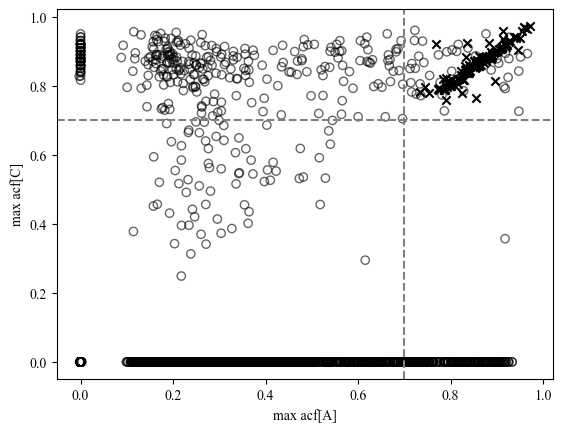

In [148]:
# analysis autocorrelation

df_yes = df[(df.max_acft_attendance > 0.7) & (df.max_acft_contagious > 0.7)]
df_yes = df_yes[(df_yes.argmax_acft_attendance >= (df_yes.argmax_acft_contagious - 1)) & (df_yes.argmax_acft_attendance <= (df_yes.argmax_acft_contagious + 1))]
df_no = df[~df.isin(df_yes)].dropna()

plt.scatter(df_no.max_acft_attendance, df_no.max_acft_contagious, marker='o', facecolor='none', edgecolor='k', alpha = 0.6)
plt.scatter(df_yes.max_acft_attendance, df_yes.max_acft_contagious, marker='x', c='k')
plt.axvline(0.7, color='grey', linestyle='--')
plt.axhline(0.7, color='grey', linestyle='--')
plt.xlabel("max acf[A]")
plt.ylabel("max acf[C]")
plt.show()

df[(df.max_acft_attendance > 0.7) & (df.max_acft_contagious > 0.7)].to_excel("test.xlsx", index = False)

In [146]:
# study parameter difference for double cyclicity or not

pars = ['threshold', 'contagious_threshold', 'contagious_duration', 'people_memory_weight','contagious_thresholdNotPresent', 'SIR_AgentsRecoveryTime']
dict_pars_cycl = {'pars':[], 'mean_cycl':[], 'mean_no_cycl':[], 'diff_pct':[]}

for p in pars:
    df_inf = df[df.inf_last == 1]
    df_cycl = df_inf[df_inf.cycl == 1]
    df_no_cycl = df_inf[df_inf.cycl == 0]
    
    pct_diff = (np.mean(df_cycl[p]) - np.mean(df_no_cycl[p])) / np.mean(df_inf[p])
    #print(f'The difference between the mean of {p} for infected and not infected is {100 * pct_diff:.2f} %')

    dict_pars_cycl['pars'].append(p)
    dict_pars_cycl['mean_cycl'].append(np.mean(df_cycl[p]))
    dict_pars_cycl['mean_no_cycl'].append(np.mean(df_no_cycl[p]))
    dict_pars_cycl['diff_pct'].append(pct_diff)

print(len(df_cycl), len(df_no_cycl))
df_pars_cycl = pd.DataFrame(dict_pars_cycl)
df_pars_cycl

141 406


,pars,mean_cycl,mean_no_cycl,diff_pct
0,threshold,0.627943,0.567340,0.103958
1,contagious_threshold,0.140284,0.191749,-0.288348
2,contagious_duration,6.687943,5.620690,0.181019
3,people_memory_weight,0.511489,0.422906,0.198732
4,contagious_thresholdNotPresent,0.323688,0.687882,-0.613117
5,SIR_AgentsRecoveryTime,4.652482,4.467980,0.040859


In [147]:
# study parameter difference with both infection and cyclicity

pars = ['threshold', 'contagious_threshold', 'contagious_duration', 'people_memory_weight','contagious_thresholdNotPresent', 'SIR_AgentsRecoveryTime']
dict_pars_all = {'pars':[], 'mean':[], 'mean_inf':[], 'mean_cycl':[], 'diff_pct_inf':[], 'diff_pct_cycl':[]}

for p in pars:
    df_inf = df[df.inf_last == 1]
    df_cycl = df_inf[df_inf.cycl == 1]
    
    pct_diff_inf = (np.mean(df_inf[p]) - np.mean(df[p])) / np.mean(df[p])
    pct_diff_cycl = (np.mean(df_cycl[p]) - np.mean(df[p])) / np.mean(df[p])

    dict_pars_all['pars'].append(p)
    dict_pars_all['mean'].append(np.mean(df[p]))
    dict_pars_all['mean_inf'].append(np.mean(df_inf[p]))
    dict_pars_all['mean_cycl'].append(np.mean(df_cycl[p]))
    dict_pars_all['diff_pct_inf'].append(pct_diff_inf)
    dict_pars_all['diff_pct_cycl'].append(pct_diff_cycl)


df_pars_all = pd.DataFrame(dict_pars_all)
df_pars_all

,pars,mean,mean_inf,mean_cycl,diff_pct_inf,diff_pct_cycl
0,threshold,0.505900,0.582962,0.627943,0.152327,0.241241
1,contagious_threshold,0.506058,0.178483,0.140284,-0.647308,-0.722791
2,contagious_duration,5.047981,5.895795,6.687943,0.167951,0.324875
3,people_memory_weight,0.504864,0.445740,0.511489,-0.117108,0.013123
4,contagious_thresholdNotPresent,0.499642,0.594004,0.323688,0.188858,-0.352160
5,SIR_AgentsRecoveryTime,5.552979,4.515539,4.652482,-0.186826,-0.162165
